# Normalization

In [1]:
%load_ext autoreload

In [102]:
%autoreload
import sppt2_v2
from pyscf import gto, scf, mp, fci
from pyscf.mp import gmp2_slow
import numpy as np
import scipy.special
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

mol = gto.Mole()
mol.atom = [['H', (2*i, 0., 0.)] for i in range(4)]
mol.basis = 'sto-3g'
#mol.spin = 1
mol.build()
nao = mol.nao

uhf = scf.UHF(mol).run()
rdm1 = uhf.make_rdm1()
rdm1[0][0] += 1
uhf = scf.UHF(mol).run(rdm1)
fock = uhf.get_fock()
test = sppt2_v2.SPPT2(mol, fock=fock)
ghfs, t2s = test.get_quad_ghfs_t2s()
alphas, betas, ws = test.quad

converged SCF energy = -1.57561647670187  <S^2> = 4.5519144e-14  2S+1 = 1
converged SCF energy = -1.72116940651972  <S^2> = 0.94605216  2S+1 = 2.1872834
SCF not converged.
SCF energy = -1.13157661795357 after 0 cycles  <S^2> = 0.94605223  2S+1 = 2.1872835
E(GMP2) = -1.80855753571482  E_corr = -0.0873881291945666
SCF not converged.
SCF energy = -1.13157661795357 after 0 cycles  <S^2> = 0.94605223  2S+1 = 2.1872835
E(GMP2) = -1.80855753571482  E_corr = -0.0873881291945665
SCF not converged.
SCF energy = -1.13157661795357 after 0 cycles  <S^2> = 0.94605223  2S+1 = 2.1872835
E(GMP2) = -1.80855753571482  E_corr = -0.0873881291945665
SCF not converged.
SCF energy = -1.13157661795357 after 0 cycles  <S^2> = 0.94605223  2S+1 = 2.1872835
E(GMP2) = -1.80855753571482  E_corr = -0.0873881291945664
SCF not converged.
SCF energy = -1.13157661795357 after 0 cycles  <S^2> = 0.94605223  2S+1 = 2.1872835
E(GMP2) = -1.80855753571482  E_corr = -0.0873881291945664
SCF not converged.
SCF energy = -1.1315766

## $\langle\psi^{(0)}_{g}|\psi^{(0)}_{g}\rangle$

In [103]:
for i1, ghf_rows1 in enumerate(ghfs):
    for j1, ghf1 in enumerate(ghf_rows1):
        for i2, ghf_rows2 in enumerate(ghfs):
            for j2, ghf2 in enumerate(ghf_rows2):
                if (i1, j1) != (i2, j2):
                    continue
                
                mo_occ1 = ghf1.mo_occ
                mo_occ2 = ghf2.mo_occ
                mo_coeff1 = ghf1.mo_coeff
                mo_coeff2 = ghf2.mo_coeff
                t21 = t2s[i1, j1]
                t22 = t2s[i2, j2]
                
                norm = test.det_ovlp(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2)[0]
                print(norm)

1.0
1.000000000000001
0.9999999999999998
0.9999999999999972
0.9999999999999981
1.0000000000000007
1.0
0.9999999999999976


## $\langle\psi^{(1)}_{g}|\psi^{(1)}_{g}\rangle$

In [104]:
for i1, ghf_rows1 in enumerate(ghfs):
    for j1, ghf1 in enumerate(ghf_rows1):
        for i2, ghf_rows2 in enumerate(ghfs):
            for j2, ghf2 in enumerate(ghf_rows2):
                if (i1, j1) != (i2, j2):
                    continue
                
                mo_occ1 = ghf1.mo_occ
                mo_occ2 = ghf2.mo_occ
                mo_coeff1 = ghf1.mo_coeff
                mo_coeff2 = ghf2.mo_coeff
                t21 = t2s[i1, j1]
                t22 = t2s[i2, j2]
                
                norm = test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22)
                print(norm)

(0.11553174335143421-9.522286102177355e-35j)
(0.11553174335143451-3.999755968787801e-34j)
(0.11553174335143405-4.614152611355865e-48j)


/Users/shufay/Documents/quantum_chemistry/spin_projected_PT/sppt2_v2.py:736: RuntimeWarning: invalid value encountered in true_divide
  


(0.11553174335143397+1.4835352526681954e-48j)
(0.11553174335143405+3.863576259930909e-34j)
(0.11553174335143432+1.6629086287023904e-35j)
(0.11553174335143407-1.6739737234819039e-49j)
(0.11553174335143399+4.664311725924718e-48j)


## $\langle\tilde{\psi}_{g}|\tilde{\psi}_{g}\rangle$

In [105]:
for i1, ghf_rows1 in enumerate(ghfs):
    for j1, ghf1 in enumerate(ghf_rows1):
        for i2, ghf_rows2 in enumerate(ghfs):
            for j2, ghf2 in enumerate(ghf_rows2):
                if (i1, j1) != (i2, j2):
                    continue
                
                mo_occ1 = ghf1.mo_occ
                mo_occ2 = ghf2.mo_occ
                mo_coeff1 = ghf1.mo_coeff
                mo_coeff2 = ghf2.mo_coeff
                t21 = t2s[i1, j1]
                t22 = t2s[i2, j2]
                
                norm = 1 + test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22)
                print(norm)

(1.1155317433514342-9.522286102177355e-35j)
(1.1155317433514345-3.999755968787801e-34j)
(1.115531743351434-4.614152611355865e-48j)
(1.115531743351434+1.4835352526681954e-48j)
(1.115531743351434+3.863576259930909e-34j)
(1.1155317433514342+1.6629086287023904e-35j)
(1.115531743351434-1.6739737234819039e-49j)
(1.115531743351434+4.664311725924718e-48j)


## Plot normalization as a function of bond length.

In [58]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
norms = []

for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao

    if dms is not None:
        dms[0][0] += 1
    
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    # Test SPPT2 rotate fock.
    test = sppt2_v2.SPPT2(mol, fock=fock)

    # Normalization.
    norm = test.norm(s, m, k)

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 norm = {norm}\n')

    norms.append(norm)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 norm = (2.0050549659400567+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 norm = (2.0067280067413034+0j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.785179998218698 after 0 cycles  <S

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


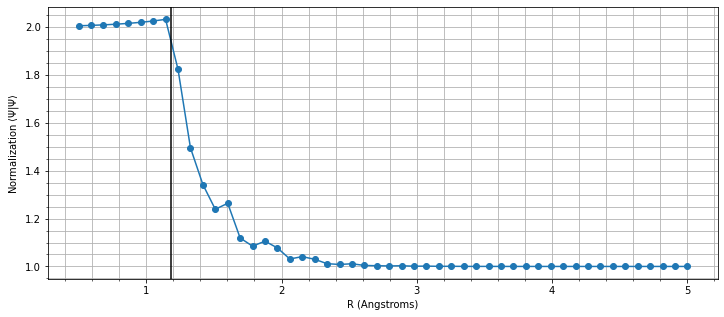

In [71]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, norms, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('Normalization $\\langle \\Psi | \\Psi \\rangle$')
plt.show()

Does this make sense?

So we know the true solution for H2: at small bond lengths, $|\Psi\rangle = |\uparrow \downarrow\rangle$ (note that this is a single Slater determinant); at large bond lengths, $|\Psi\rangle = |\uparrow \downarrow\rangle - |\downarrow \uparrow\rangle$. The normalizations are respectively $\langle \Psi | \Psi \rangle = 1$ and $\langle \Psi | \Psi \rangle = \langle \uparrow \downarrow | \uparrow \downarrow\rangle + \langle \downarrow \uparrow | \downarrow \uparrow \rangle = 2$.

What terms are contributing to this increase? Let's plot the terms contributing to $\langle \Psi | \Psi \rangle$ seperately.

### 1. $\sum_g |w_g|^2 \langle \tilde{\psi}_g | \tilde{\psi}_g \rangle$

In [60]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term1s = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
    
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = test.quad_coeffs(s, m, k)
    term1 = 0
    
    for i1, ghf_rows1 in enumerate(ghfs):
        for j1, ghf1 in enumerate(ghf_rows1):
            for i2, ghf_rows2 in enumerate(ghfs):
                for j2, ghf2 in enumerate(ghf_rows2):
                    if (i1, j1) != (i2, j2):
                        continue

                    mo_occ1 = ghf1.mo_occ
                    mo_occ2 = ghf2.mo_occ
                    mo_coeff1 = ghf1.mo_coeff
                    mo_coeff2 = ghf2.mo_coeff
                    t21 = t2s[i1, j1]
                    t22 = t2s[i2, j2]

                    term1 += coeffs[i1, j1] * (1 + test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22))

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term1 = {term1}\n')

    term1s.append(term1)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term1 = (1.0025274829700281+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term1 = (1.0033640033894728+0j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.785179998218698 after 0 cycles  

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


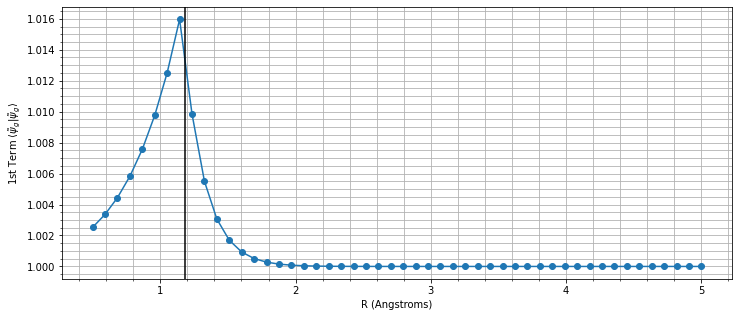

In [70]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term1s, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('1st Term $\\langle \\tilde{\\psi}_g | \\tilde{\\psi}_g \\rangle$')
plt.show()

There's a clear transition between the RHF and UHF solutions.  
Let's try just looking at one term $\langle \tilde{\psi}_g | \tilde{\psi}_g \rangle$.

In [81]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term1s_one = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
    
    uhf = scf.UHF(mol).run(dms, verbose=0)    
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = test.quad_coeffs(s, m, k)
    
    ghf1 = ghfs[0,0]
    ghf2 = ghfs[0,0]
    t21 = t2s[0,0]
    t22 = t2s[0,0]
    
    mo_occ1 = ghf1.mo_occ
    mo_occ2 = ghf2.mo_occ
    mo_coeff1 = ghf1.mo_coeff
    mo_coeff2 = ghf2.mo_coeff

    term1 = (1 + test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22))

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term1 = {term1}\n')

    term1s_one.append(term1)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term1 = (1.0025274829700281+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term1 = (1.0033640033894728+0j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.785179998218698 after 0 cycles  

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


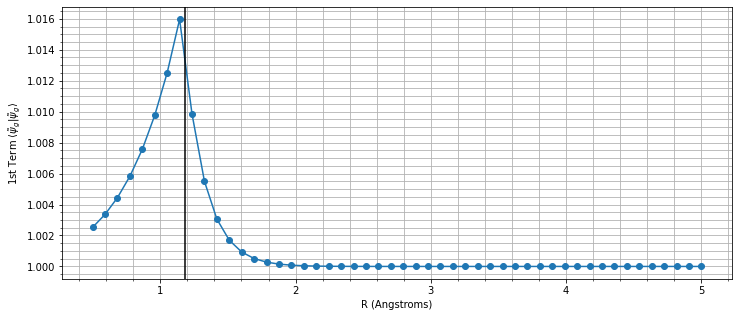

In [82]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term1s_one, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('1st Term $\\langle \\tilde{\\psi}_g | \\tilde{\\psi}_g \\rangle$')
plt.show()

In [83]:
term1s_one

[(1.0025274829700281+0j),
 (1.0033640033894728+0j),
 (1.004448128189616+0j),
 (1.0058296655205192+0j),
 (1.0075732703134703+0j),
 (1.009765397343932+0j),
 (1.0125173372994696+0j),
 (1.015964195150964+0j),
 (1.009845191402164+0j),
 (1.0054996563713998+0j),
 (1.0030588616285547+0j),
 (1.0016929640771912+0j),
 (1.0009323051557801+0j),
 (1.0005108899094803+0j),
 (1.0002785471672238+0j),
 (1.0001510947475776+0j),
 (1.0000815357054904+0j),
 (1.0000437681419947+0j),
 (1.0000233678395345+0j),
 (1.00001240515747+0j),
 (1.0000065452201146+0j),
 (1.000003430219556+0j),
 (1.0000017843501403+0j),
 (1.00000092050948+0j),
 (1.0000004705650947+0j),
 (1.0000002381917434+0j),
 (1.0000001193100645+0j),
 (1.0000000591113594+0j),
 (1.0000000289592494+0j),
 (1.000000014027527+0j),
 (1.0000000067185033+0j),
 (1.0000000031822234+0j),
 (1.0000000014909192+0j),
 (1.0000000006911156+0j),
 (1.0000000003170433+0j),
 (1.0000000001439557+0j),
 (1.0000000000647014+0j),
 (1.0000000000287843+0j),
 (1.000000000012673+0j

Recall
$$\langle \tilde{\psi}_g | \tilde{\psi}_g \rangle = 1 + \langle \psi^{(1)}_g | \psi^{(1)}_g \rangle$$ 

$$\langle \psi^{(1)}_g | \psi^{(1)}_g \rangle = \sum_{a<b, \alpha<\beta} \ \sum_{c<d, \gamma<\delta} (t^g)^*_{ab\alpha\beta} (t^g)_{cd\gamma\delta} \langle \{\psi^{(0)}_g\}^{\alpha\beta}_{ab} | \{\psi^{(0)}_g\}^{\gamma\delta}_{cd} \rangle,$$

Let's try printing some of the GMP2 $t$ amplitudes.

In [77]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
dms = None
amps = []

for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)

    if dms is not None:
        dms[0][0] += 1
    
    ghf = scf.GHF(mol).run(dms, verbose=0)
    dms = ghf.make_rdm1()
    gmp2 = mp.GMP2(ghf).run(verbose=0)
    amp = gmp2.t2[np.absolute(gmp2.t2)>0]
    amps.append(np.absolute(amp)[0])
    print(amp)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
[-0.05027408  0.05027408  0.05027408 -0.05027408]

Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
[-0.05800003  0.05800003  0.05800003 -0.05800003]

Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
[-0.06669429  0.06669429  0.06669429 -0.06669429]

Bond Length: 0.7755102040816326
Building molecule...
Using basis set sto3g
[-0.07635225  0.07635225  0.07635225 -0.07635225]

Bond Length: 0.8673469387755102
Building molecule...
Using basis set sto3g
[-0.08702454  0.08702454  0.08702454 -0.08702454]

Bond Length: 0.9591836734693877
Building molecule...
Using basis set sto3g
[ 0.09882003 -0.09882003 -0.09882003  0.09882003]

Bond Length: 1.0510204081632653
Building molecule...
Using basis set sto3g
[-0.11188091  0.11188091  0.11188091 -0.11188091]

Bond Length: 1.1428571428571428
Building molecule...
Using basis set sto3g
[ 0.1263495 -0.1263495 -0.1263495  0.1263495]

Bond Lengt

The non-zero amplitudes all actually have the same magnitude. Let's try plotting them.

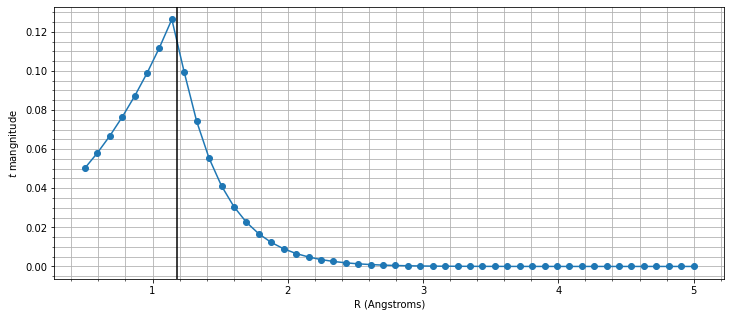

In [78]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, amps, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('$t$ mangnitude')
plt.show()

This explains the behaviour of $\langle \tilde\psi_g | \tilde\psi_g \rangle$. The $t$ amplitudes decrease as the bond lengths increase, which means that $\langle \tilde\psi_g | \tilde\psi_g \rangle \rightarrow 1$.

### 2. $\sum_{g \neq g'} w^*_g w_{g'} \langle \tilde{\psi}_g | \tilde{\psi}_{g'} \rangle$

In [72]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term2s = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
        
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = np.sqrt(test.quad_coeffs(s, m, k))
    term2 = 0
    
    for i1, ghf_rows1 in enumerate(ghfs):
        for j1, ghf1 in enumerate(ghf_rows1):
            for i2, ghf_rows2 in enumerate(ghfs):
                for j2, ghf2 in enumerate(ghf_rows2):
                    if (i1, j1) == (i2, j2):
                        continue

                    mo_occ1 = ghf1.mo_occ
                    mo_occ2 = ghf2.mo_occ
                    mo_coeff1 = ghf1.mo_coeff
                    mo_coeff2 = ghf2.mo_coeff
                    t21 = t2s[i1, j1]
                    t22 = t2s[i2, j2]
                    
                    term2 += np.conj(coeffs[i1, j1]) * coeffs[i2, j2] * (
                            test.det_ovlp(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2)[0] + 
                            test.norm_01(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t22) +
                            np.conj(test.norm_01(mo_coeff2, mo_coeff1, mo_occ2, mo_occ1, t21)) + 
                            test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22))

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term2 = {term2}\n')

    term2s.append(term2)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term2 = (1.0025274829700284+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term2 = (1.0033640033518305+0j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.785179998218698 after 0 cycles  

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


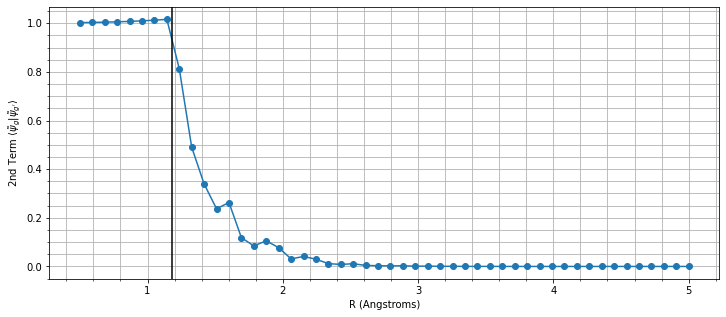

In [73]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term2s, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('2nd Term $\\langle \\tilde{\\psi}_g | \\tilde{\\psi}_{g\'} \\rangle$')
plt.show()

Let's try just looking at one term $\langle \tilde{\psi}_g | \tilde{\psi}_{g'} \rangle$.

In [89]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term2s_one = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
        
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = np.sqrt(test.quad_coeffs(s, m, k))
    
    ghf1 = ghfs[0,0]
    ghf2 = ghfs[1,0]
    t21 = t2s[0,0]
    t22 = t2s[1,0]
    
    mo_occ1 = ghf1.mo_occ
    mo_occ2 = ghf2.mo_occ
    mo_coeff1 = ghf1.mo_coeff
    mo_coeff2 = ghf2.mo_coeff

    term2 = test.det_ovlp(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2)[0] + \
            test.norm_01(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t22) + \
            np.conj(test.norm_01(mo_coeff2, mo_coeff1, mo_occ2, mo_occ1, t21)) + \
            test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22)

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term2 = {term2}\n')

    term2s_one.append(term2)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term2 = (1.0025274829700281+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term2 = (1.0033640033518303-4.58970860698067e-27j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.7851799982186

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


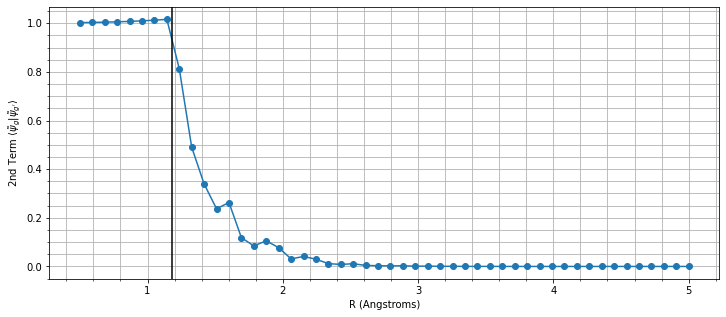

In [90]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term2s_one, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('2nd Term $\\langle \\tilde{\\psi}_g | \\tilde{\\psi}_{g\'} \\rangle$')
plt.show()

Recall 

$$
\langle \tilde{\psi}_g | \tilde{\psi}_{g'} \rangle = \langle \psi^{(0)}_g | \psi^{(0)}_{g'} \rangle + \langle \psi^{(0)}_g | \psi^{(1)}_{g'} \rangle + \langle \psi^{(1)}_g | \psi^{(0)}_{g'} \rangle + \langle \psi^{(1)}_g | \psi^{(1)}_{g'} \rangle.
$$

For small $R$, we get the RHF solution, where the Fock matrices are invariant to the rotations. So we get the same eigenfunctions and GMP2 results at all quadrature points, hence the same determinants $| \psi^{(0)}_g \rangle, | \psi^{(1)}_g \rangle$ over all points. This means that $\langle \psi^{(0)}_g | \psi^{(0)}_{g'} \rangle = 1$ and $\langle \psi^{(0)}_g | \psi^{(1)}_{g'} \rangle = 0$ for all $g, g'$. Thus we have 

$$
\langle \tilde{\psi}_g | \tilde{\psi}_{g'} \rangle = 1 + \langle \psi^{(1)}_g | \psi^{(1)}_{g'} \rangle.
$$

Try plotting $\langle \psi^{(1)}_g | \psi^{(1)}_{g'} \rangle$.

In [92]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term11s = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
        
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = np.sqrt(test.quad_coeffs(s, m, k))
    
    ghf1 = ghfs[0,0]
    ghf2 = ghfs[1,0]
    t21 = t2s[0,0]
    t22 = t2s[1,0]
    
    mo_occ1 = ghf1.mo_occ
    mo_occ2 = ghf2.mo_occ
    mo_coeff1 = ghf1.mo_coeff
    mo_coeff2 = ghf2.mo_coeff

    term11 = test.norm_11(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2, t21, t22)

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term11 = {term11}\n')

    term11s.append(term11)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term11 = (0.0025274829700280763+0j)


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term11 = (0.0033640033893301167-4.589708610337633e-27j)


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.7851

/Users/shufay/envs/pyscf2/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


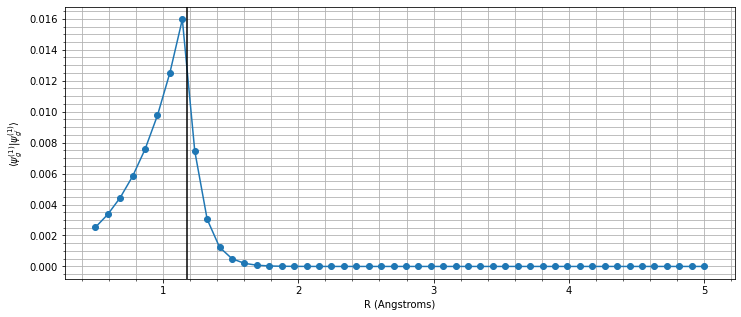

In [93]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term11s, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('$\\langle \\psi^{(1)}_g | \\psi^{(1)}_{g\'} \\rangle$')
plt.show()

Try plotting $\langle \psi^{(0)}_g | \psi^{(0)}_{g'} \rangle$.

In [96]:
start = 0.5
stop = 5
points = 50
n = 2
basis = 'sto3g'
s = m = k = 0

bond_lengths = np.linspace(start, stop, points)
dms = None
term00s = []


for bond_length in bond_lengths:
    print('\nBond Length: {}'.format(bond_length))
    mol = sppt2_v2.build_chain(n, bond_length, basis)
    nao = mol.nao
    
    if dms is not None:
        dms[0][0] += 1
        
    uhf = scf.UHF(mol).run(dms, verbose=0)
    dms = uhf.make_rdm1()
    fock = uhf.get_fock()

    test = sppt2_v2.SPPT2(mol, fock=fock)
    ghfs, t2s = test.get_quad_ghfs_t2s()
    coeffs = np.sqrt(test.quad_coeffs(s, m, k))
    
    ghf1 = ghfs[0,0]
    ghf2 = ghfs[1,0]
    t21 = t2s[0,0]
    t22 = t2s[1,0]
    
    mo_occ1 = ghf1.mo_occ
    mo_occ2 = ghf2.mo_occ
    mo_coeff1 = ghf1.mo_coeff
    mo_coeff2 = ghf2.mo_coeff

    term00 = test.det_ovlp(mo_coeff1, mo_coeff2, mo_occ1, mo_occ2)[0]

    print('\n=====================================')
    print(f's = {s}')
    print(f'm = {m}')
    print(f'k = {k}')
    print(f'SPPT2 term00 = {term00}\n')

    term00s.append(term00)


Bond Length: 0.5
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271
SCF not converged.
SCF energy = -0.780918750956874 after 0 cycles  <S^2> = 0  2S+1 = 1
E(GMP2) = -1.05148606962497  E_corr = -0.00848979508487271

s = 0
m = 0
k = 0
SPPT2 term00 = 1.0


Bond Length: 0.5918367346938775
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857
SCF not converged.
SCF energy = -0.796915866410806 after 0 cycles  <S^2> = 4.2420734e-11  2S+1 = 1
E(GMP2) = -1.10835787062349  E_corr = -0.010052424096857

s = 0
m = 0
k = 0
SPPT2 term00 = 0.9999999999575793


Bond Length: 0.6836734693877551
Building molecule...
Using basis set sto3g
SCF not converged.
SCF energy = -0.785179998218698 after 0 cycles  <S^2> = 2.5371277e-10  

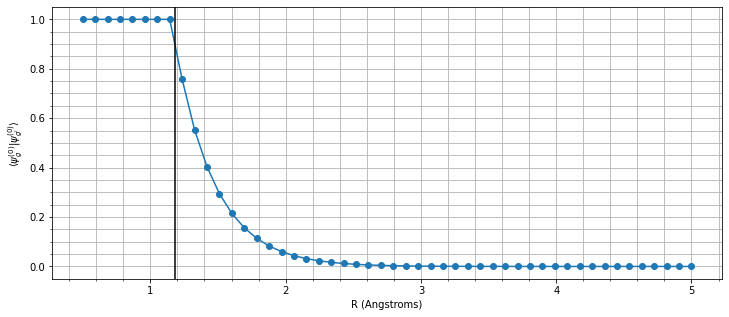

In [97]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.plot(bond_lengths, term00s, '-o')
ax = plt.gca()
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())
plt.grid(b=True, which='both')
plt.axvline(x=1.18, ymin=0, ymax=1, color='black')
plt.xlabel('R (Angstroms)')
plt.ylabel('$\\langle \\psi^{(0)}_g | \\psi^{(0)}_{g\'} \\rangle$')
plt.show()